Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib

Load data

In [3]:
df = pd.read_csv("D:\Master\Kuliah\Semester 7\Machine Learning\Tubes\Dataset\data.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\NISANUR\AppData\Local\Temp\ipykernel_5804\784728479.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\Master\Kuliah\Semester 7\Machine Learning\Tubes\Dataset\data.csv")


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height,patient_code
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,0,6000,4000,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,0,6000,4000,1
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,6,1872,1053,2
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,0,1872,1053,3
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,11,6000,4000,4


Deskripsi Statistik Kolom age_approx:
count    33126.000000
mean        48.872336
std         14.365684
min          0.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         90.000000
Name: age_approx, dtype: float64
Rentang umur: 0.0 - 90.0


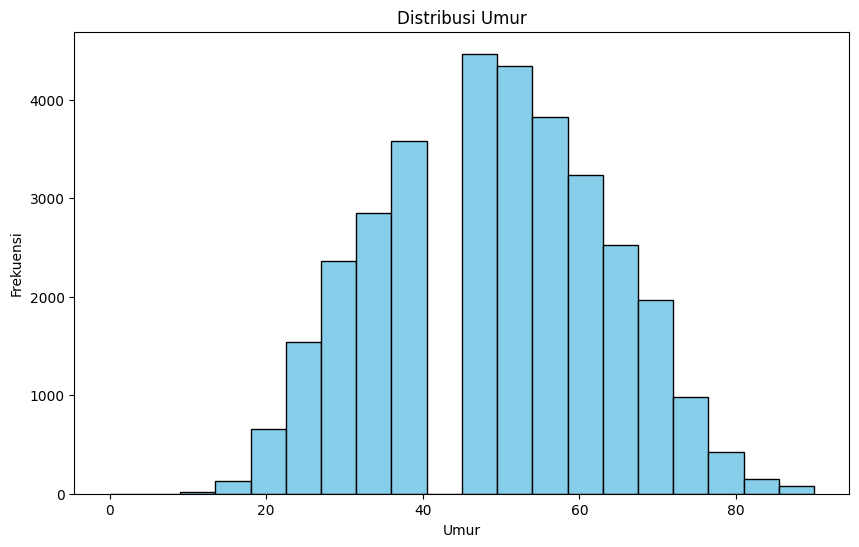

In [20]:
# Menampilkan informasi dasar tentang kolom 'age_approx'
print("Deskripsi Statistik Kolom age_approx:")
print(df['age_approx'].describe())

# Menentukan rentang umur
age_min = df['age_approx'].min()
age_max = df['age_approx'].max()
print(f"Rentang umur: {age_min} - {age_max}")

# Visualisasi distribusi umur
plt.figure(figsize=(10, 6))
df['age_approx'].hist(bins=20, edgecolor='black', color='skyblue')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.grid(False)
plt.show()

In [21]:
# Filter data melanoma (benign_malignant == 'malignant')
melanoma_data = df[df['benign_malignant'] == 'malignant']

# Menghitung jumlah melanoma berdasarkan lokasi anatomi
location_counts = melanoma_data['anatom_site_general_challenge'].value_counts()

# Menampilkan hasil lokasi melanoma
print("Jumlah Melanoma Berdasarkan Lokasi Anatomi:")
print(location_counts)

# Visualisasi lokasi melanoma
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribusi Lokasi Anatomi Melanoma')
plt.xlabel('Lokasi Anatomi')
plt.ylabel('Jumlah Melanoma')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

KeyError: 'anatom_site_general_challenge'

Preprocessing Data

In [4]:
#  Cek missing values
df['age_approx'].fillna(df['age_approx'].median(), inplace=True)
df['sex'].fillna('unknown', inplace=True)
df['anatom_site_general_challenge'].fillna('unknown', inplace=True)

C:\Users\NISANUR\AppData\Local\Temp\ipykernel_5804\2179826950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_approx'].fillna(df['age_approx'].median(), inplace=True)
C:\Users\NISANUR\AppData\Local\Temp\ipykernel_5804\2179826950.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [5]:
# Encoding fitur kategorikal
df['sex'] = df['sex'].map({'male': 0, 'female': 1, 'unknown': 2})
df = pd.get_dummies(df, columns=['anatom_site_general_challenge'], drop_first=True)

In [6]:
# Split data menjadi fitur (X) dan target (y)
X = df.drop(columns=['target', 'image_name', 'patient_id', 'diagnosis', 'benign_malignant', 'tfrecord', 'patient_code'])
y = df['target']

In [7]:
# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Distribusi kolom 'sex':
 sex
0    51.560708
1    48.243072
2     0.196220
Name: proportion, dtype: float64


C:\Users\NISANUR\AppData\Local\Temp\ipykernel_5804\2224303680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='pastel')


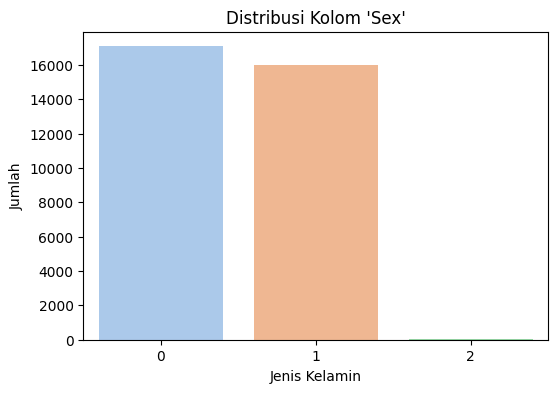

In [22]:
# Analisis distribusi kolom 'sex'
sex_distribution = df['sex'].value_counts(normalize=True) * 100
print("Distribusi kolom 'sex':\n", sex_distribution)

# Visualisasi distribusi 'sex'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', palette='pastel')
plt.title("Distribusi Kolom 'Sex'")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()


Deskripsi Statistik Kolom age_approx:
count    33126.000000
mean        48.872336
std         14.365684
min          0.000000
25%         40.000000
50%         50.000000
75%         60.000000
max         90.000000
Name: age_approx, dtype: float64
Rentang umur: 0.0 - 90.0


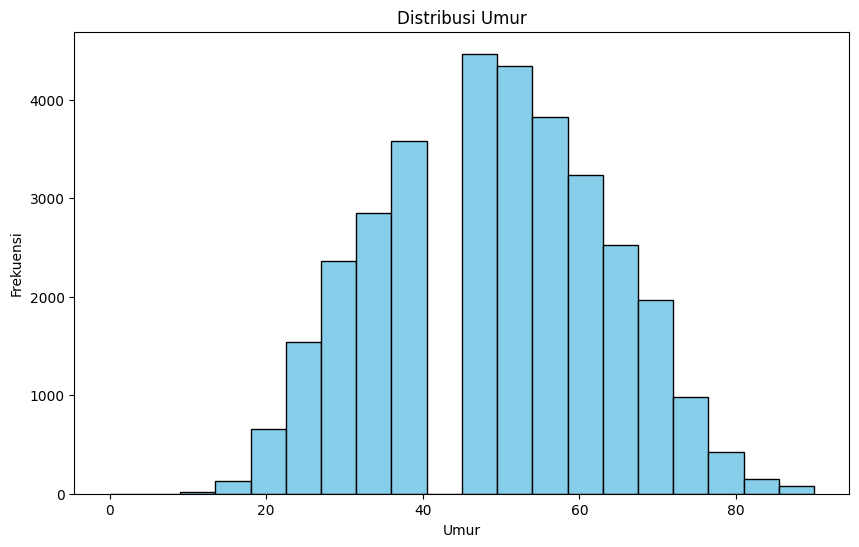

In [23]:
# Menampilkan informasi dasar tentang kolom 'age_approx'
print("Deskripsi Statistik Kolom age_approx:")
print(df['age_approx'].describe())

# Menentukan rentang umur
age_min = df['age_approx'].min()
age_max = df['age_approx'].max()
print(f"Rentang umur: {age_min} - {age_max}")

# Visualisasi distribusi umur
plt.figure(figsize=(10, 6))
df['age_approx'].hist(bins=20, edgecolor='black', color='skyblue')
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.grid(False)
plt.show()

C:\Users\NISANUR\AppData\Local\Temp\ipykernel_5804\1794288944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anatomy_counts.index, y=anatomy_counts.values, palette='viridis')


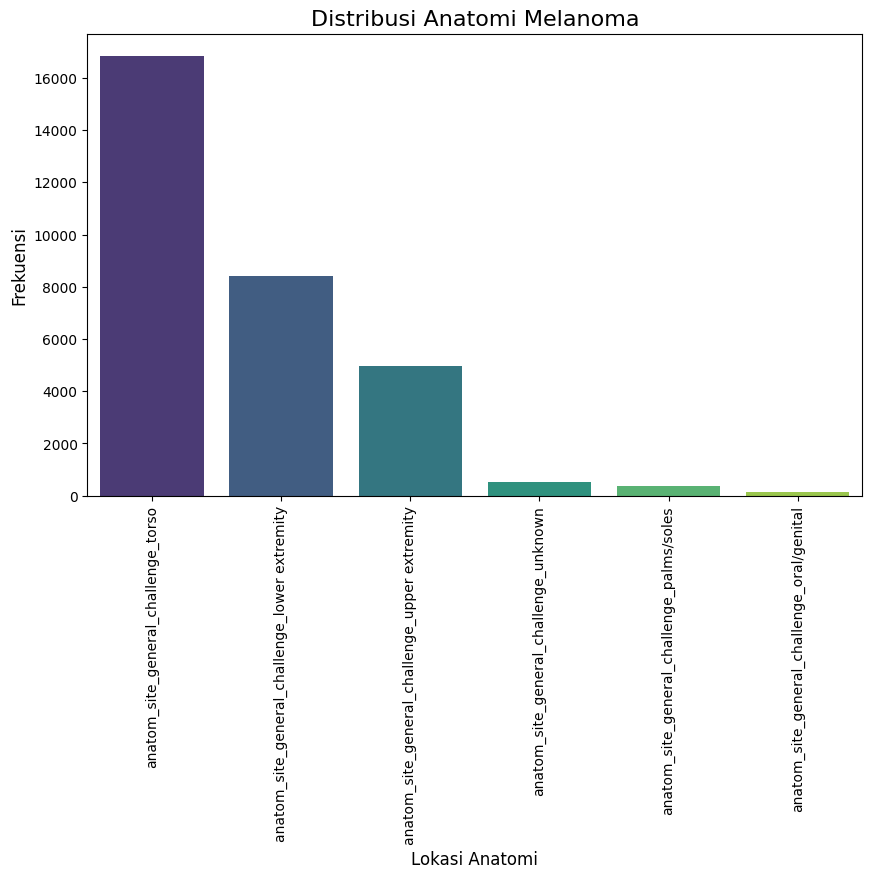

In [25]:
# Menyusun kolom-kolom one-hot encoding untuk anatomi
anatomy_columns = [col for col in df.columns if 'anatom_site_general_challenge_' in col]

# Menjumlahkan frekuensi untuk setiap kategori
anatomy_counts = df[anatomy_columns].sum().sort_values(ascending=False)

# Visualisasi distribusi anatomi melanoma
plt.figure(figsize=(10, 6))
sns.barplot(x=anatomy_counts.index, y=anatomy_counts.values, palette='viridis')
plt.title('Distribusi Anatomi Melanoma', fontsize=16)
plt.xlabel('Lokasi Anatomi', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=90)  # Memutar label agar lebih mudah dibaca
plt.show()

Train Random Forest Model

In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluasi Model

In [9]:
# Prediksi pada data uji
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [10]:
# Evaluasi dengan classification report dan AUC
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6507
           1       0.33      0.03      0.06       119

    accuracy                           0.98      6626
   macro avg       0.66      0.52      0.53      6626
weighted avg       0.97      0.98      0.97      6626

ROC-AUC Score: 0.7084891125652658


In [ ]:
# Menghitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan Confusion Matrix
print("Confusion Matrix:\n", cm)

# Menghitung metrik evaluasi
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()  # Akurasi
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # Sensitivitas (Recall untuk kelas positif)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Spesifisitas
print(f"Akurasi: {accuracy:.2%}")
print(f"Sensitivitas: {sensitivity:.2%}")
print(f"Spesifisitas: {specificity:.2%}")

Confusion Matrix:
 [[6499    8]
 [ 115    4]]
Akurasi: 98.14%
Sensitivitas: 3.36%
Spesifisitas: 99.88%


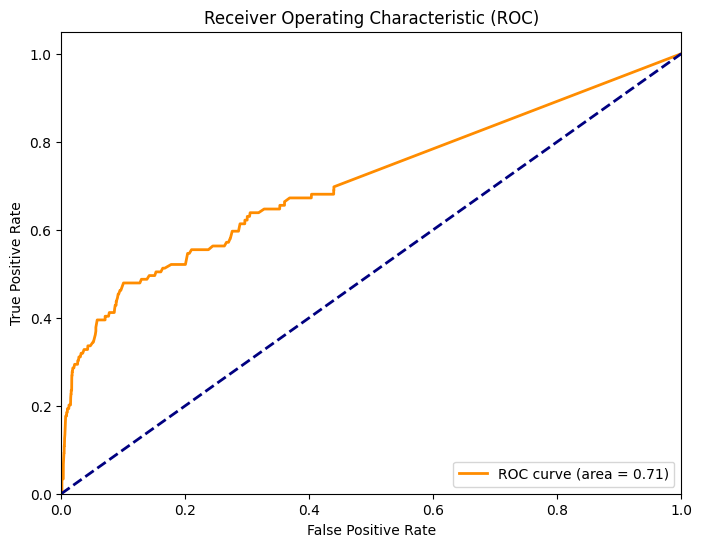

In [ ]:
# 1. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # y_test adalah target asli dari data uji
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

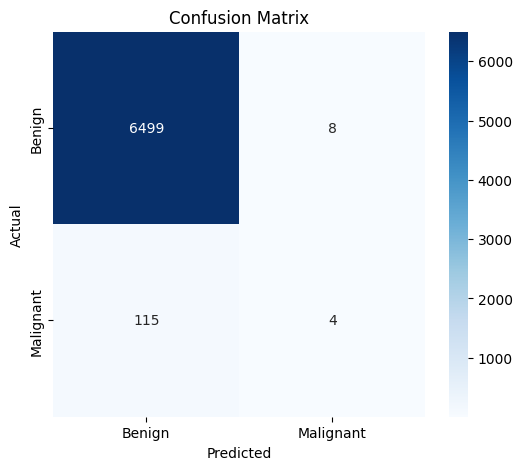

In [ ]:
# 2. Confusion Matrix
# Misalkan kita memiliki y_pred (hasil prediksi) untuk data uji
y_pred = rf.predict(X_test)  # X_test adalah data uji

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


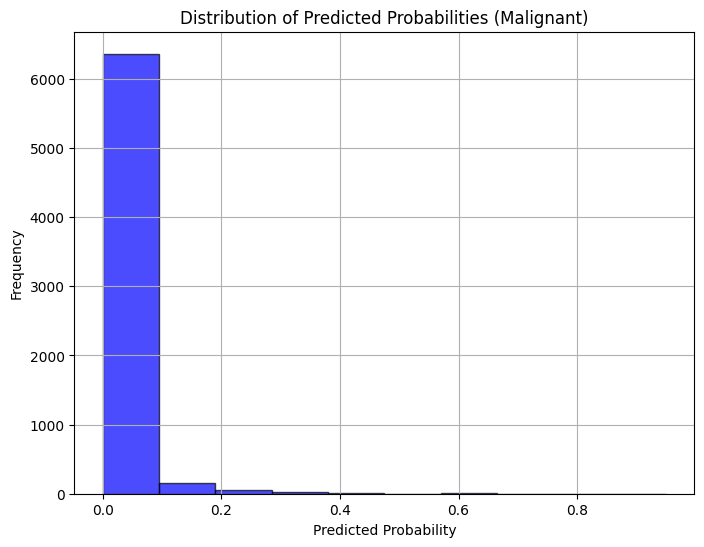

In [ ]:
# 3. Histogram untuk Prediksi Probabilitas
plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Predicted Probabilities (Malignant)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Hyperparameter Tuning (Grid Search)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


Simpan Model

In [ ]:
# Model terbaik dari Grid Search
best_rf = grid_search.best_estimator_
joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

Load Model dan Prediksi Baru

In [ ]:
# Simulasi data baru (ganti sesuai format dataset Anda)
new_data = pd.DataFrame({
    'sex': [0], 
    'age_approx': [45], 
    'width': [224], 
    'height': [224],
    'anatom_site_general_challenge_head/neck': [1],
    # Tambahkan kolom one-hot encoding sesuai dataset asli
}, columns=X.columns)

In [ ]:
# Load model dan prediksi
loaded_model = joblib.load('random_forest_model.pkl')
new_prediction = loaded_model.predict(new_data)
new_probability = loaded_model.predict_proba(new_data)[:, 1]

print(f"Predicted Class: {new_prediction[0]}, Probability: {new_probability[0]}")

Predicted Class: 0, Probability: 0.015806339641961577
